In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime

from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_policy_evaluation_maxiter
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early
# num_iter_max=200000
env_name = 'CustomCartPole-v0'
figfilenamehead = "fig_policy_optimization_"+env_str+"_iter2_"

from config import cfg_alpha
alpha=cfg_alpha

loss_list = []
normalized_loss_list = []

policy_evaluation_maxiter = cfg_policy_evaluation_maxiter
print("policy_evaluation_maxiter",policy_evaluation_maxiter)
print("alpha",alpha)
print("seed",seed)
print(datetime.datetime.now())

policy_evaluation_maxiter 5
alpha 0.1
seed 3
2023-08-01 06:55:48.940164


In [2]:
import gym
import custom_gym
env = gym.make(env_name)

np.random.seed(seed)
random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)

4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:


from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
agent = SAC(env.observation_space.shape[0]+z_dim*2, env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_bamdp_weightedvae_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_cartpole_bamdp_weightedvae_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":agent.policy.my_np_select_action,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

# iwvi.load_base(ckpt_key="unweighted")
iwvi.load(ckpt_key="policy_optimization_iter1")

dec: h_dim 64
iwvi load ckpt1, ckpt2 ckpt_iwvi_basepartcartpole_policy_optimization_iter1 ckpt_iwvi_cartpole_policy_optimization_iter1
base load ckpt ckpt_basevi_cartpole_policy_optimization_iter1
base load self.initial_belief.data.sum() tensor(-9.5811)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(10.4462)
penalty_target_min tensor(-11.5849) penalty_target_max tensor(6.8027)
train_loss:  -8.504373862648011
valid_loss:  -8.221831150817872
h_min_tilde -11.584942 ell_tilde -8.447865320281982 kappa_tilde 0.0005645955388639343
success load ckpt_iwvi_basepartcartpole_policy_optimization_iter1
train_loss:  -5.665105694627762
valid_loss:  -11.99865683450699
weight_alpha 1.0 h_min_tilde -11.584942 ell_tilde -6.931815922603607 kappa_tilde 0.0004635831011202494


In [5]:
# plt.figure(figsize=(18,10), dpi=250)
# np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
# plt.xlabel("daming coeff")
# plt.ylabel("latent variable mean")

# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# # plt.xlim([-0.05,0.35])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.png")
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.eps")
# # plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.pdf")
# plt.show()


# for i in range(10):
#     print(debug_info[i*10 : (i+1)*10,1])
# # plt.show()
# print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_bamdppolicy_data()


 0 7.152557373046875e-07


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



 1 3.289950132369995

 2 3.2408571243286133

 3 3.6036922931671143

 4 5.222984075546265

 5 4.955264329910278

 6 3.4786198139190674

 7 3.1977663040161133

 8 3.7334835529327393

 9 3.3221471309661865

 10 3.309539556503296

 11 3.35300874710083

 12 3.2568721771240234

 13 3.1319174766540527

 14 3.28102707862854

 15 3.4836411476135254

 16 3.6456048488616943

 17 3.4221103191375732

 18 3.5625877380371094

 19 5.753763437271118

 20 3.688710927963257

 21 3.5966291427612305

 22 3.68599796295166

 23 6.856482028961182

 24 7.10196852684021

 25 6.354105472564697

 26 6.58353590965271

 27 4.411104679107666

 28 6.361775159835815

 29 3.837604522705078

 30 3.3616862297058105

 31 5.583124876022339

 32 6.500002384185791

 33 4.073883533477783

 34 4.796463251113892

 35 6.742836236953735

 36 7.282166242599487

 37 5.120871543884277

 38 3.4406120777130127

 39 6.327292442321777

 40 3.8060851097106934

 41 3.687458038330078

 42 3.5996718406677246

 43 3.4896435737609863

 44 3.

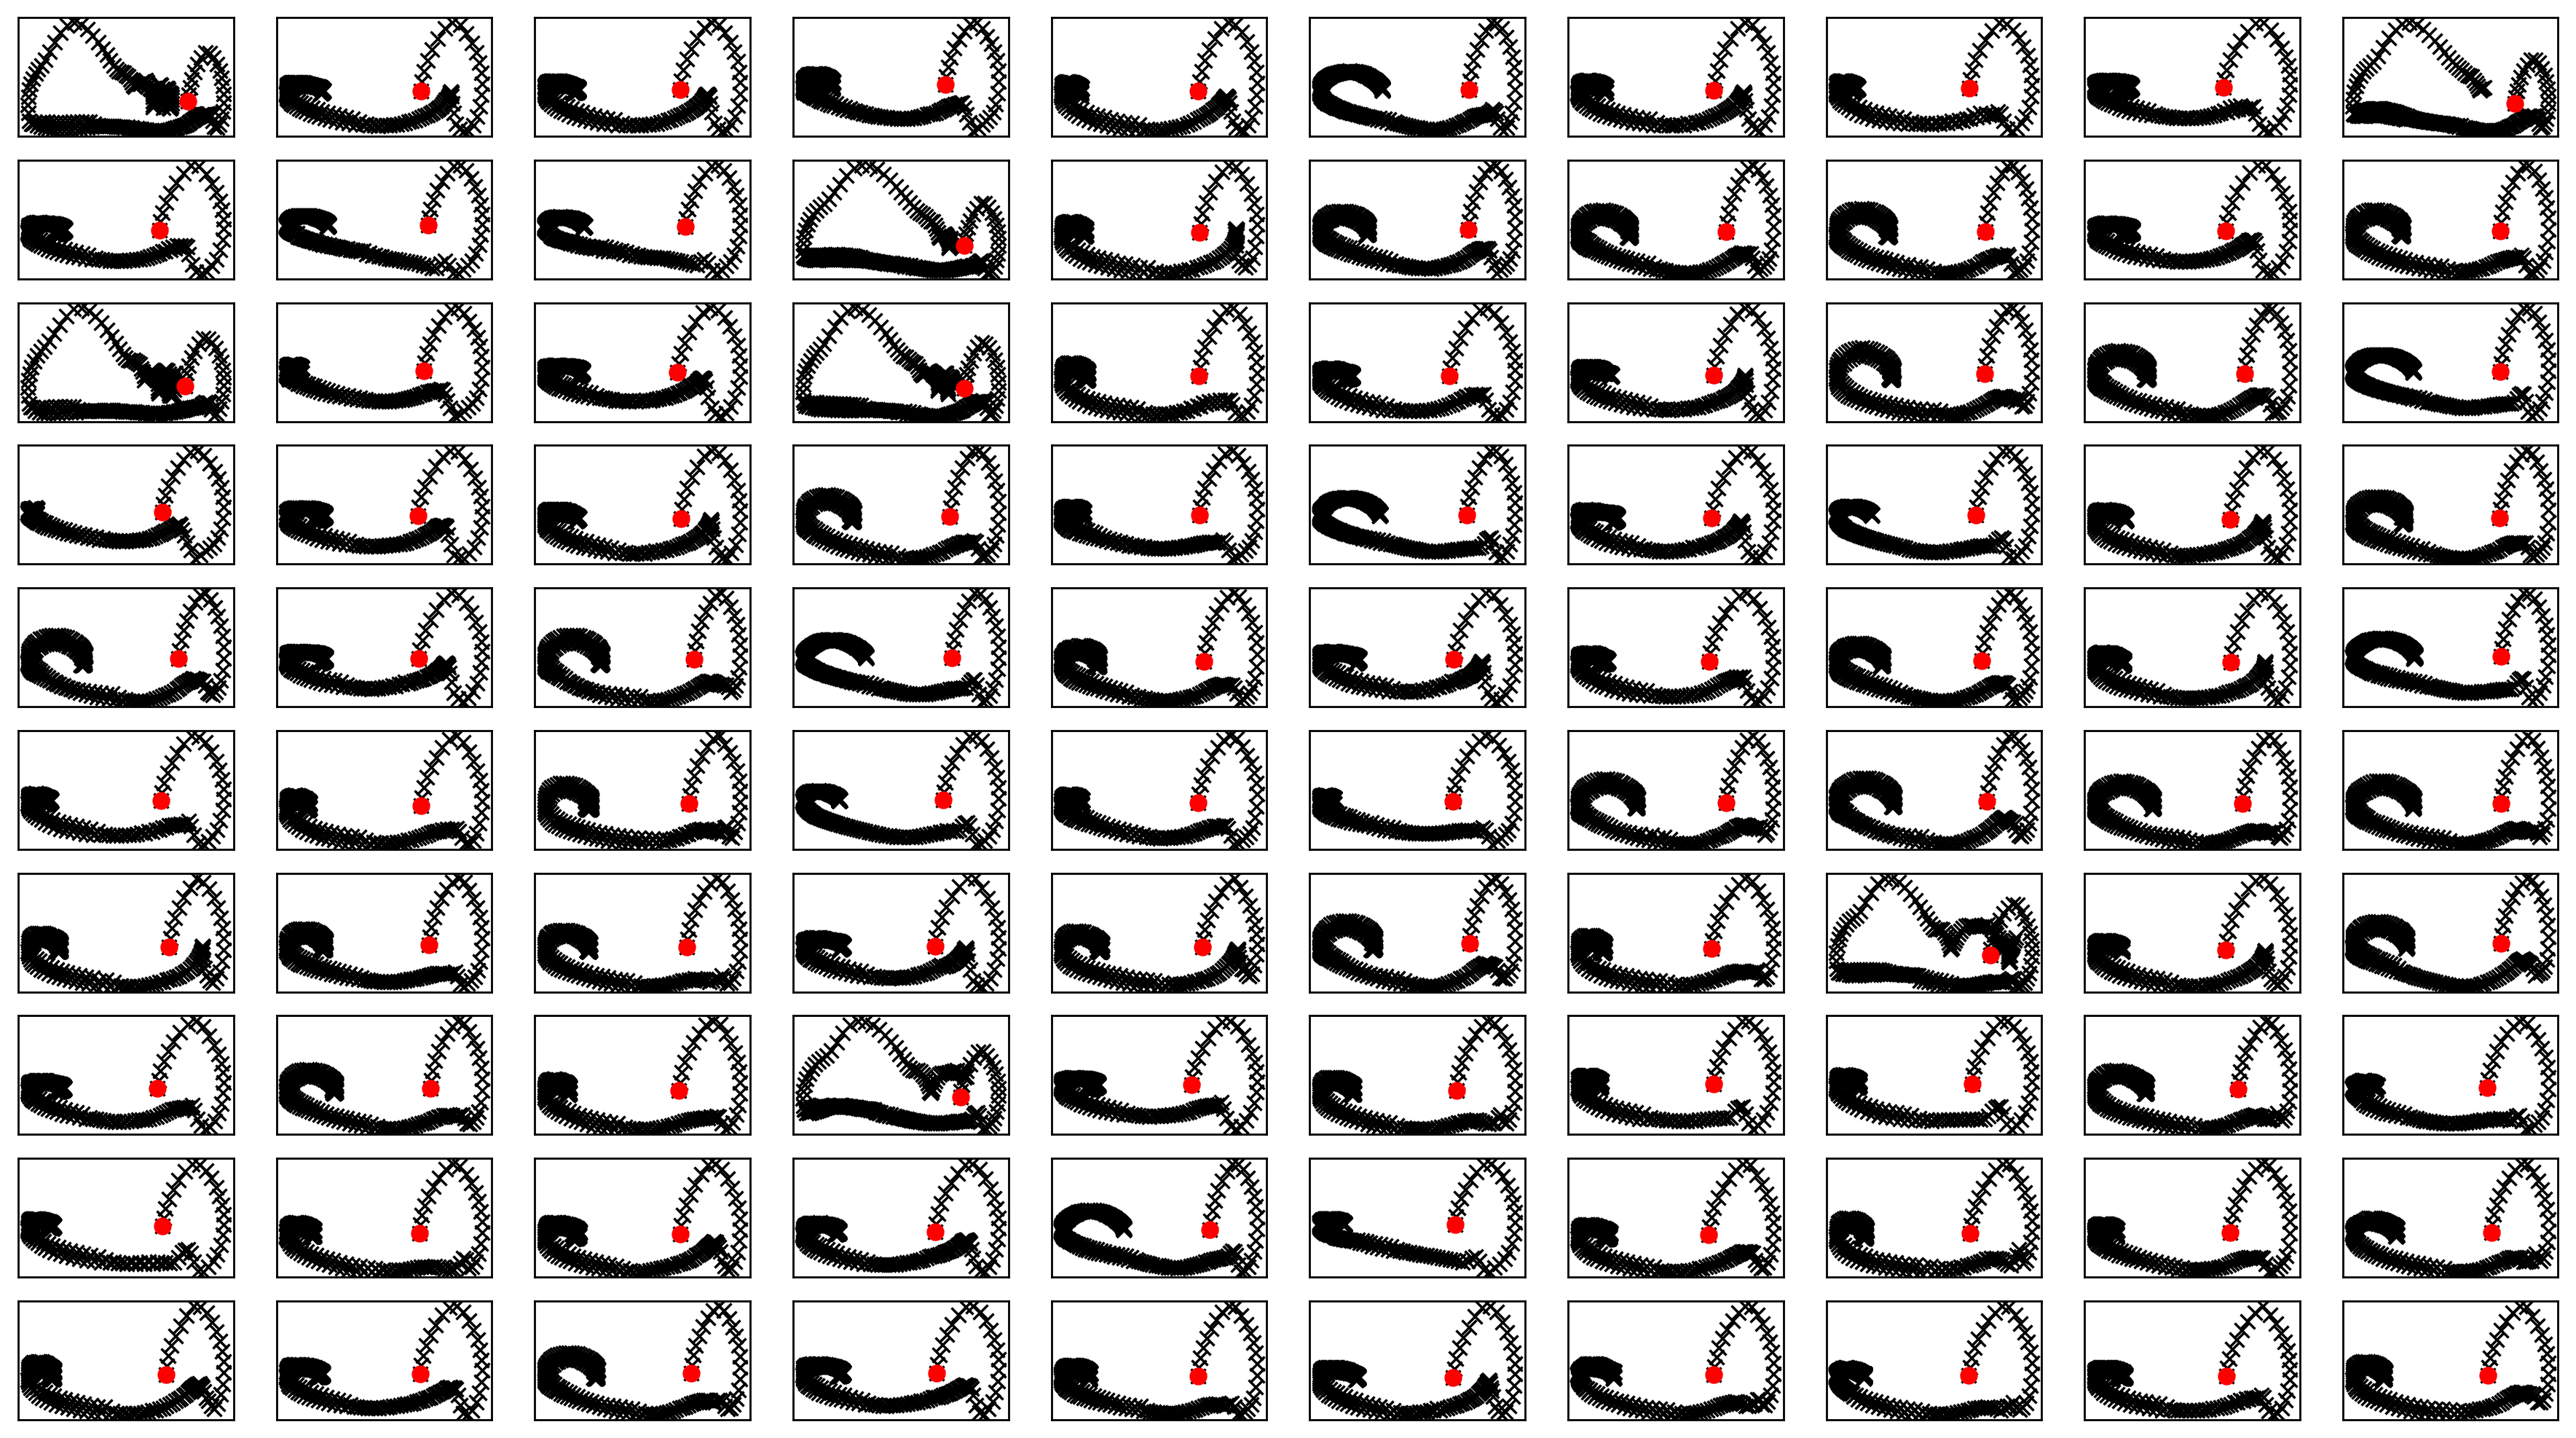

In [7]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

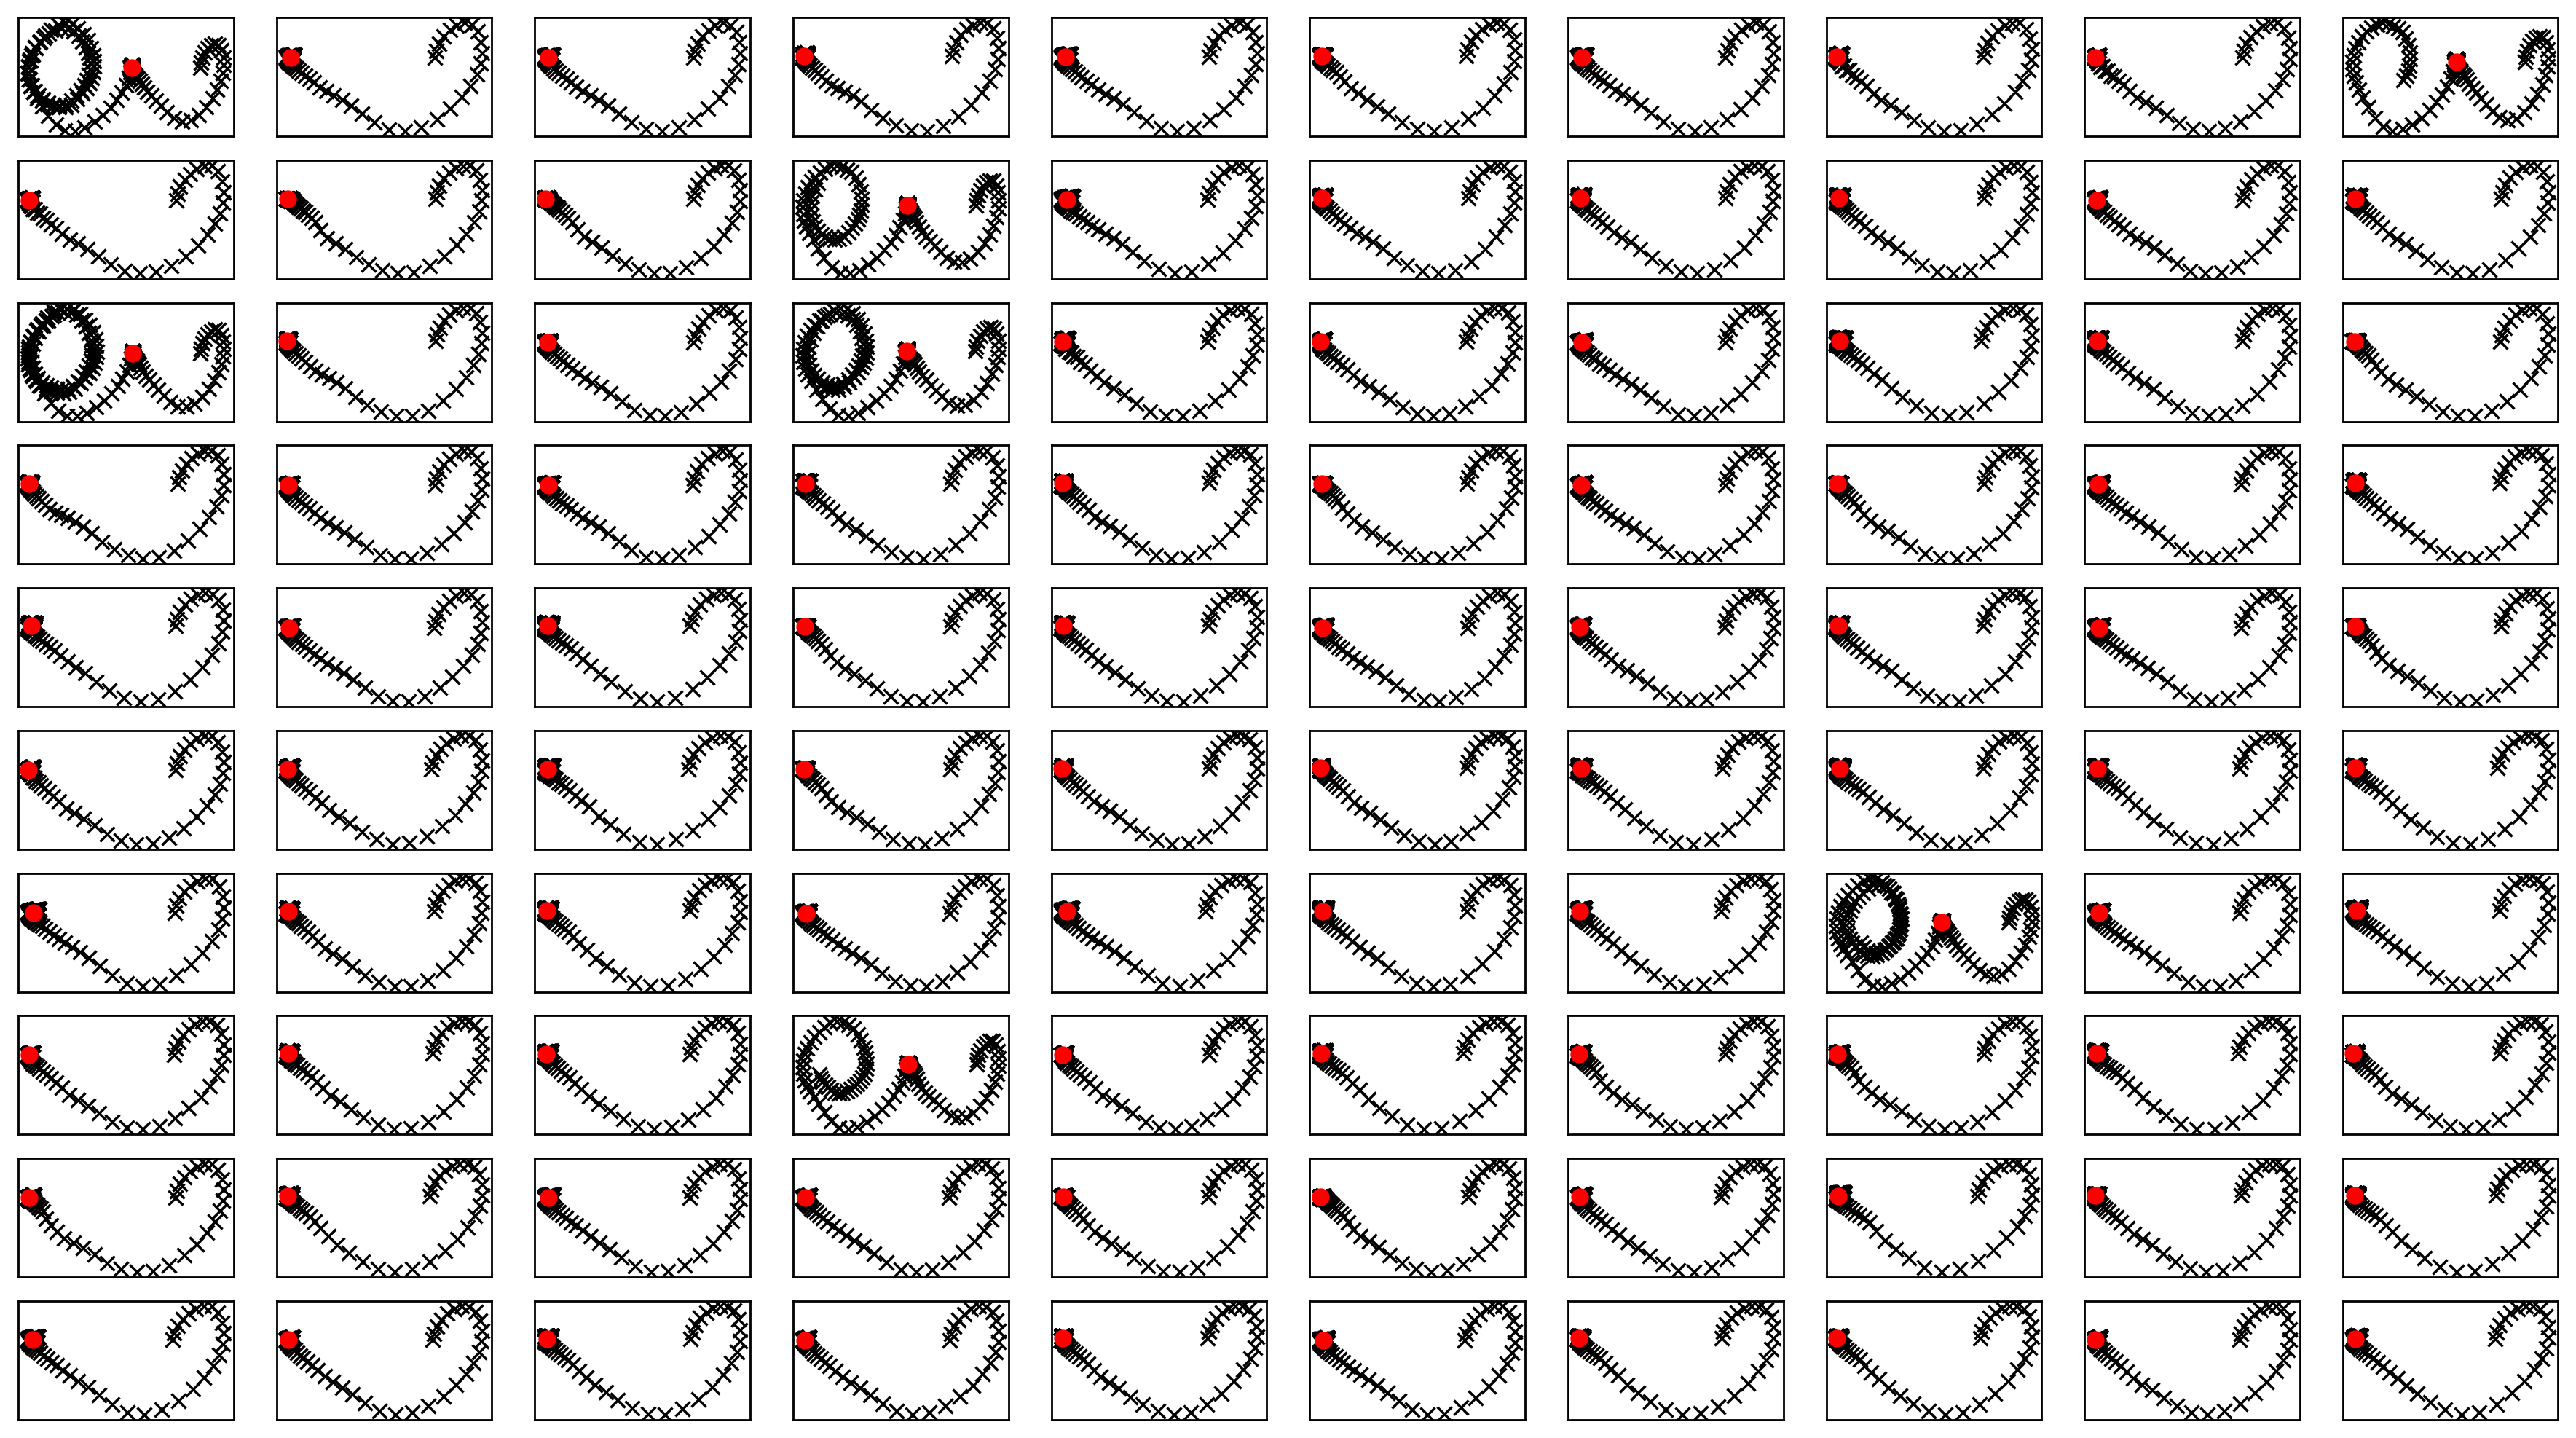

In [8]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

In [9]:
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)


 0 4.76837158203125e-07

 1 3.5351598262786865

 2 3.898128032684326

 3 3.509618043899536

 4 4.010448217391968

 5 5.049712657928467

 6 3.736294746398926

 7 3.6897261142730713

 8 3.611982822418213

 9 4.010214328765869

 10 4.680142402648926

 11 3.7088496685028076

 12 3.4715347290039062

 13 3.9812090396881104

 14 3.293012857437134

 15 3.7494940757751465

 16 3.7901735305786133

 17 4.576277732849121

 18 7.285345792770386

 19 4.944118976593018

 20 4.0402140617370605

 21 6.553832292556763

 22 5.815970420837402

 23 4.929506301879883

 24 6.790009260177612

 25 4.1153154373168945

 26 4.210991859436035

 27 4.309593915939331

 28 3.9448671340942383

 29 3.7238945960998535

 30 3.827336549758911

 31 3.7107317447662354

 32 3.5680408477783203

 33 5.361380338668823

 34 6.558516979217529

 35 7.054686546325684

 36 3.704347848892212

 37 3.6525161266326904

 38 3.8522136211395264

 39 3.6352570056915283

 40 3.613198757171631

 41 4.154209136962891

 42 3.6089940071105957



実環境方策rollout vs Sim環境方策rollout


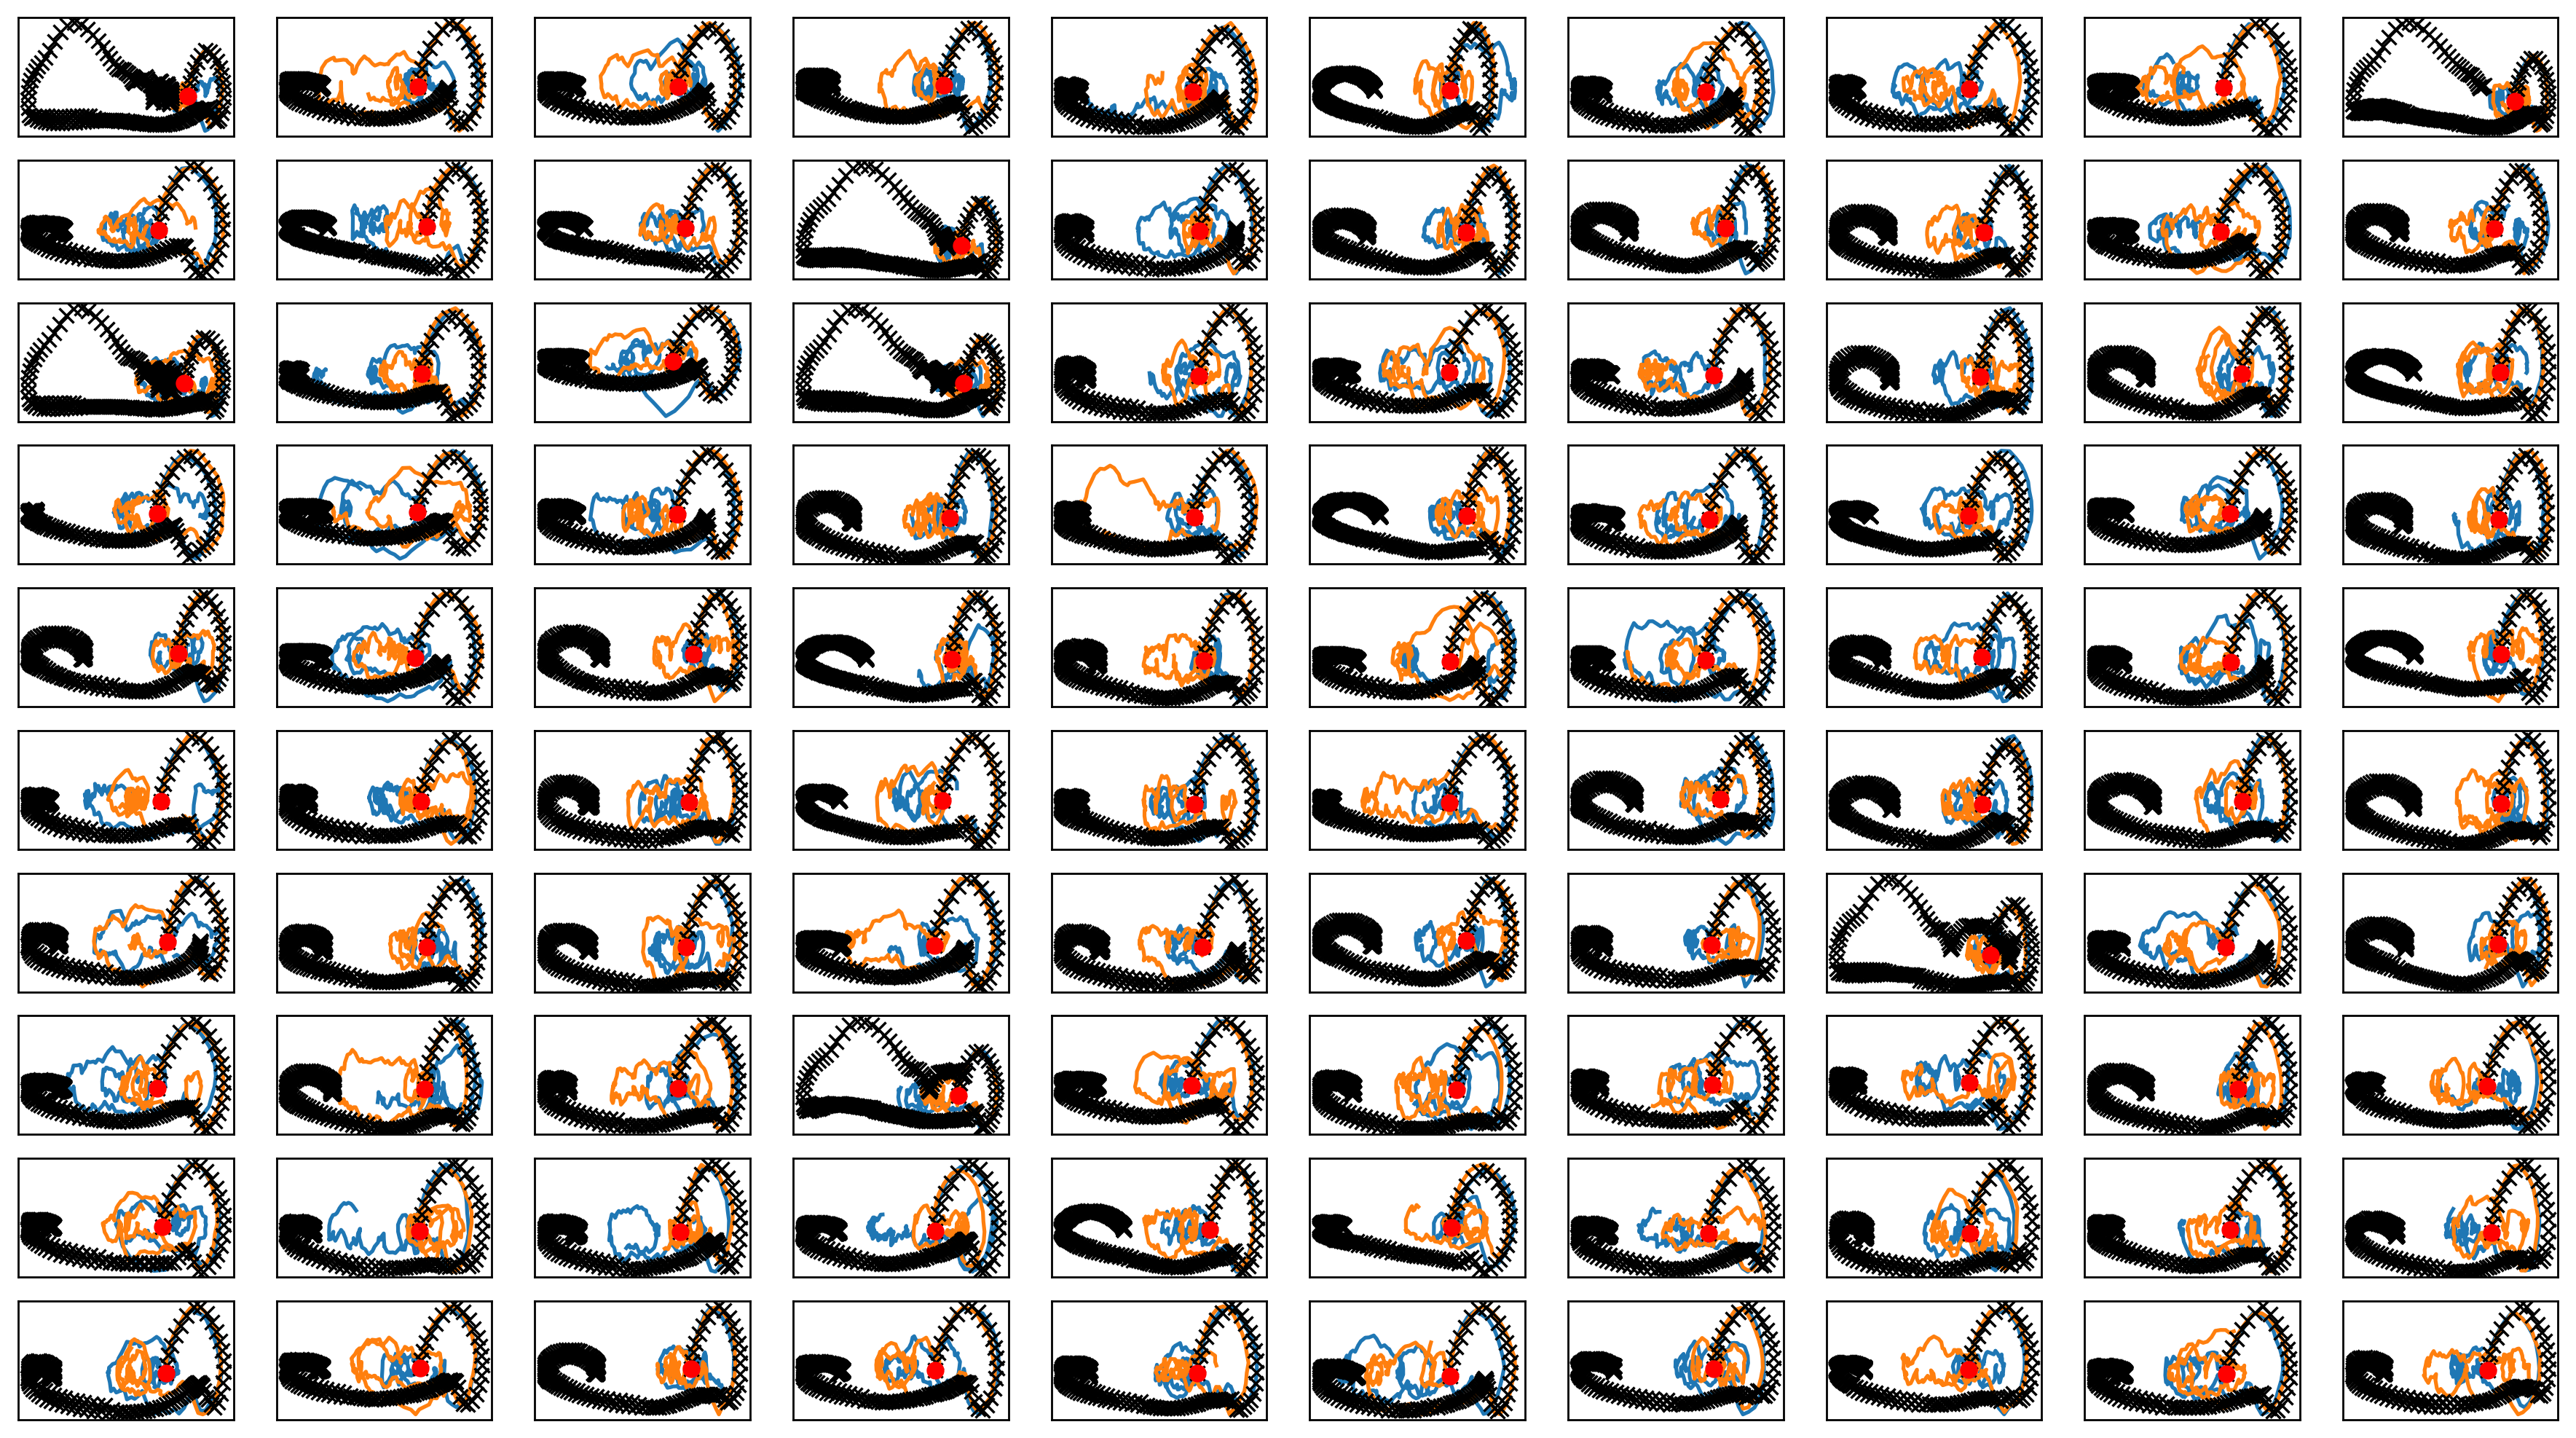

In [10]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter1.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter1.eps")
print("実環境方策rollout vs Sim環境方策rollout")

実環境方策rollout vs Sim環境方策rollout


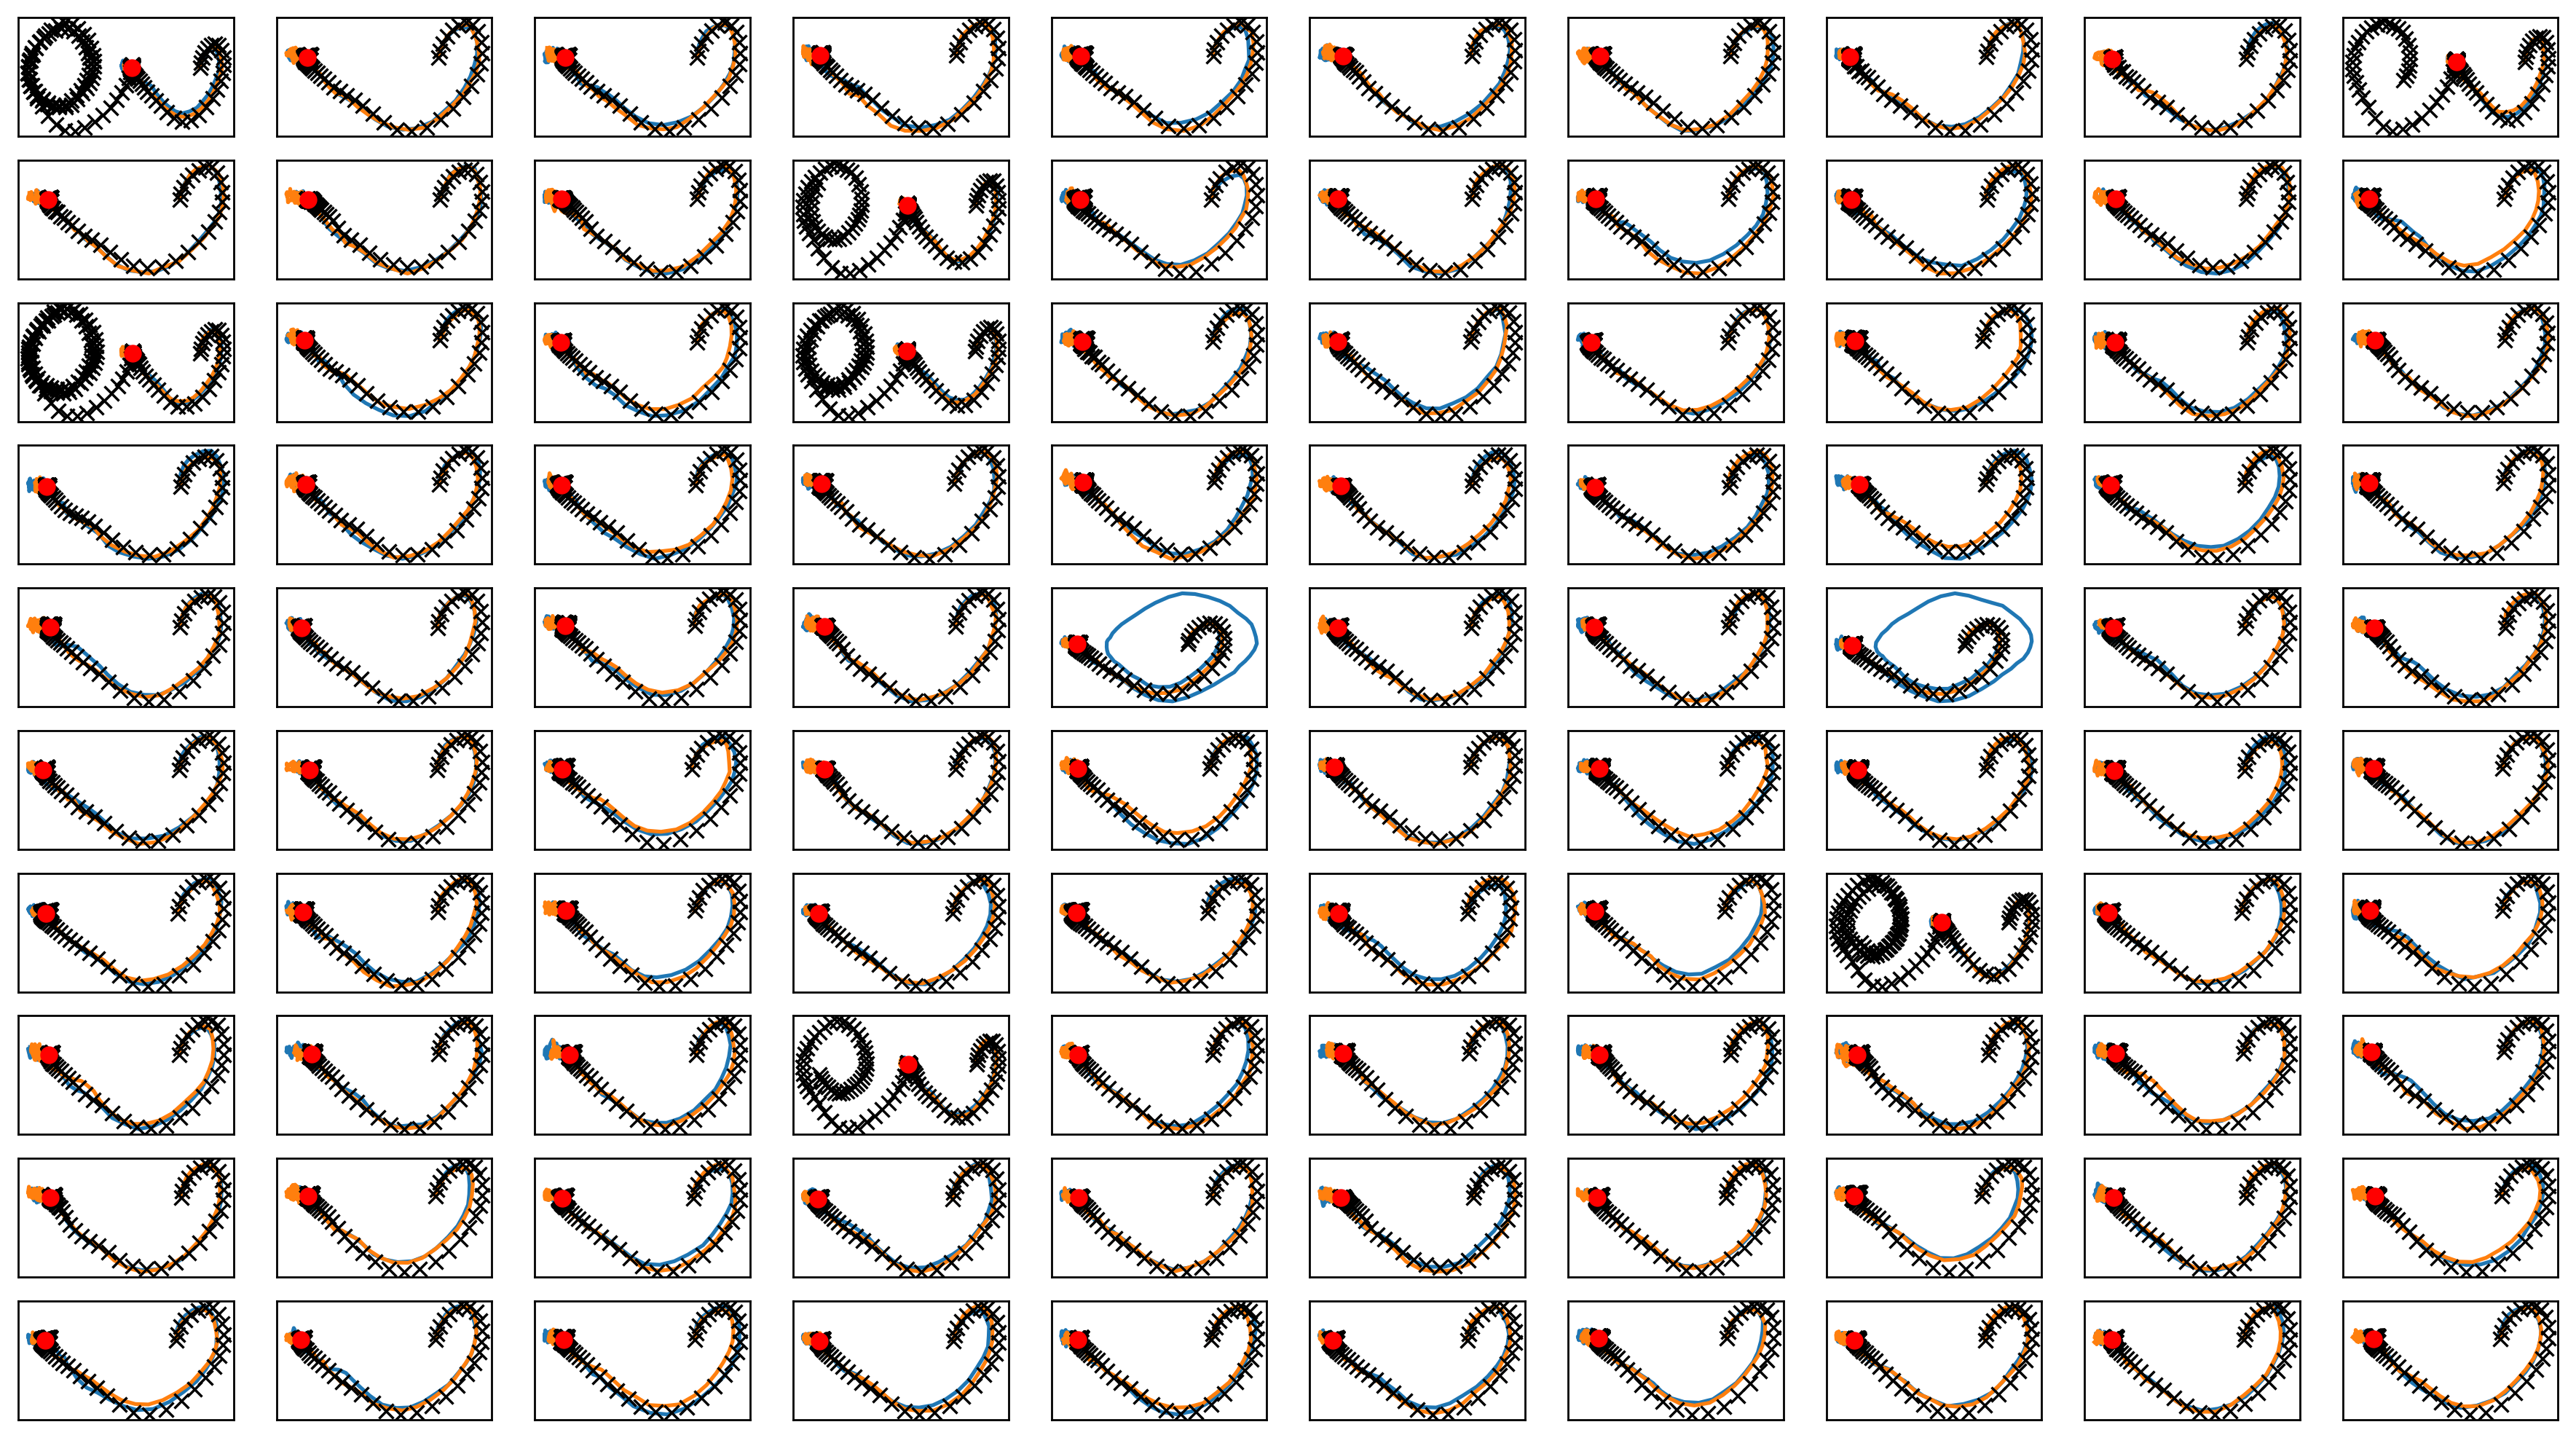

In [11]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,2], simdata0a[i][:,3]) 
    ax_list[-1].plot(simdata0b[i][:,2], simdata0b[i][:,3]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter0.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter0.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [12]:
print(datetime.datetime.now())

2023-08-01 07:18:08.071618
